In [1]:
# import packages we may need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# import dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
sample_sub_reg = pd.read_csv('./datasets/sample_sub_reg.csv')

In [3]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
# print(ds.shape)
print(test.shape)
print(train.shape)

(879, 80)
(2051, 81)


In [5]:
# print(train.info())
# for string values we want to replace null values with -9999 or something of the sort... 
# can we remap strings to ints? 

In [6]:
# make notes here of highly correlated numerical columns
# lot frontage, lot area, overall qual, year built, year remod/add, mas vnr area, basnfln SF 1,
# total bsmt SF, 1st flr sf, 2nd flr sf, gr liv area, bsmt full bath, full bath, half bath, 
# totrms abvgrd, fireplaces, garage yr built(some missings), garage cars, garage area, 
# wood deck sf, open porch sf

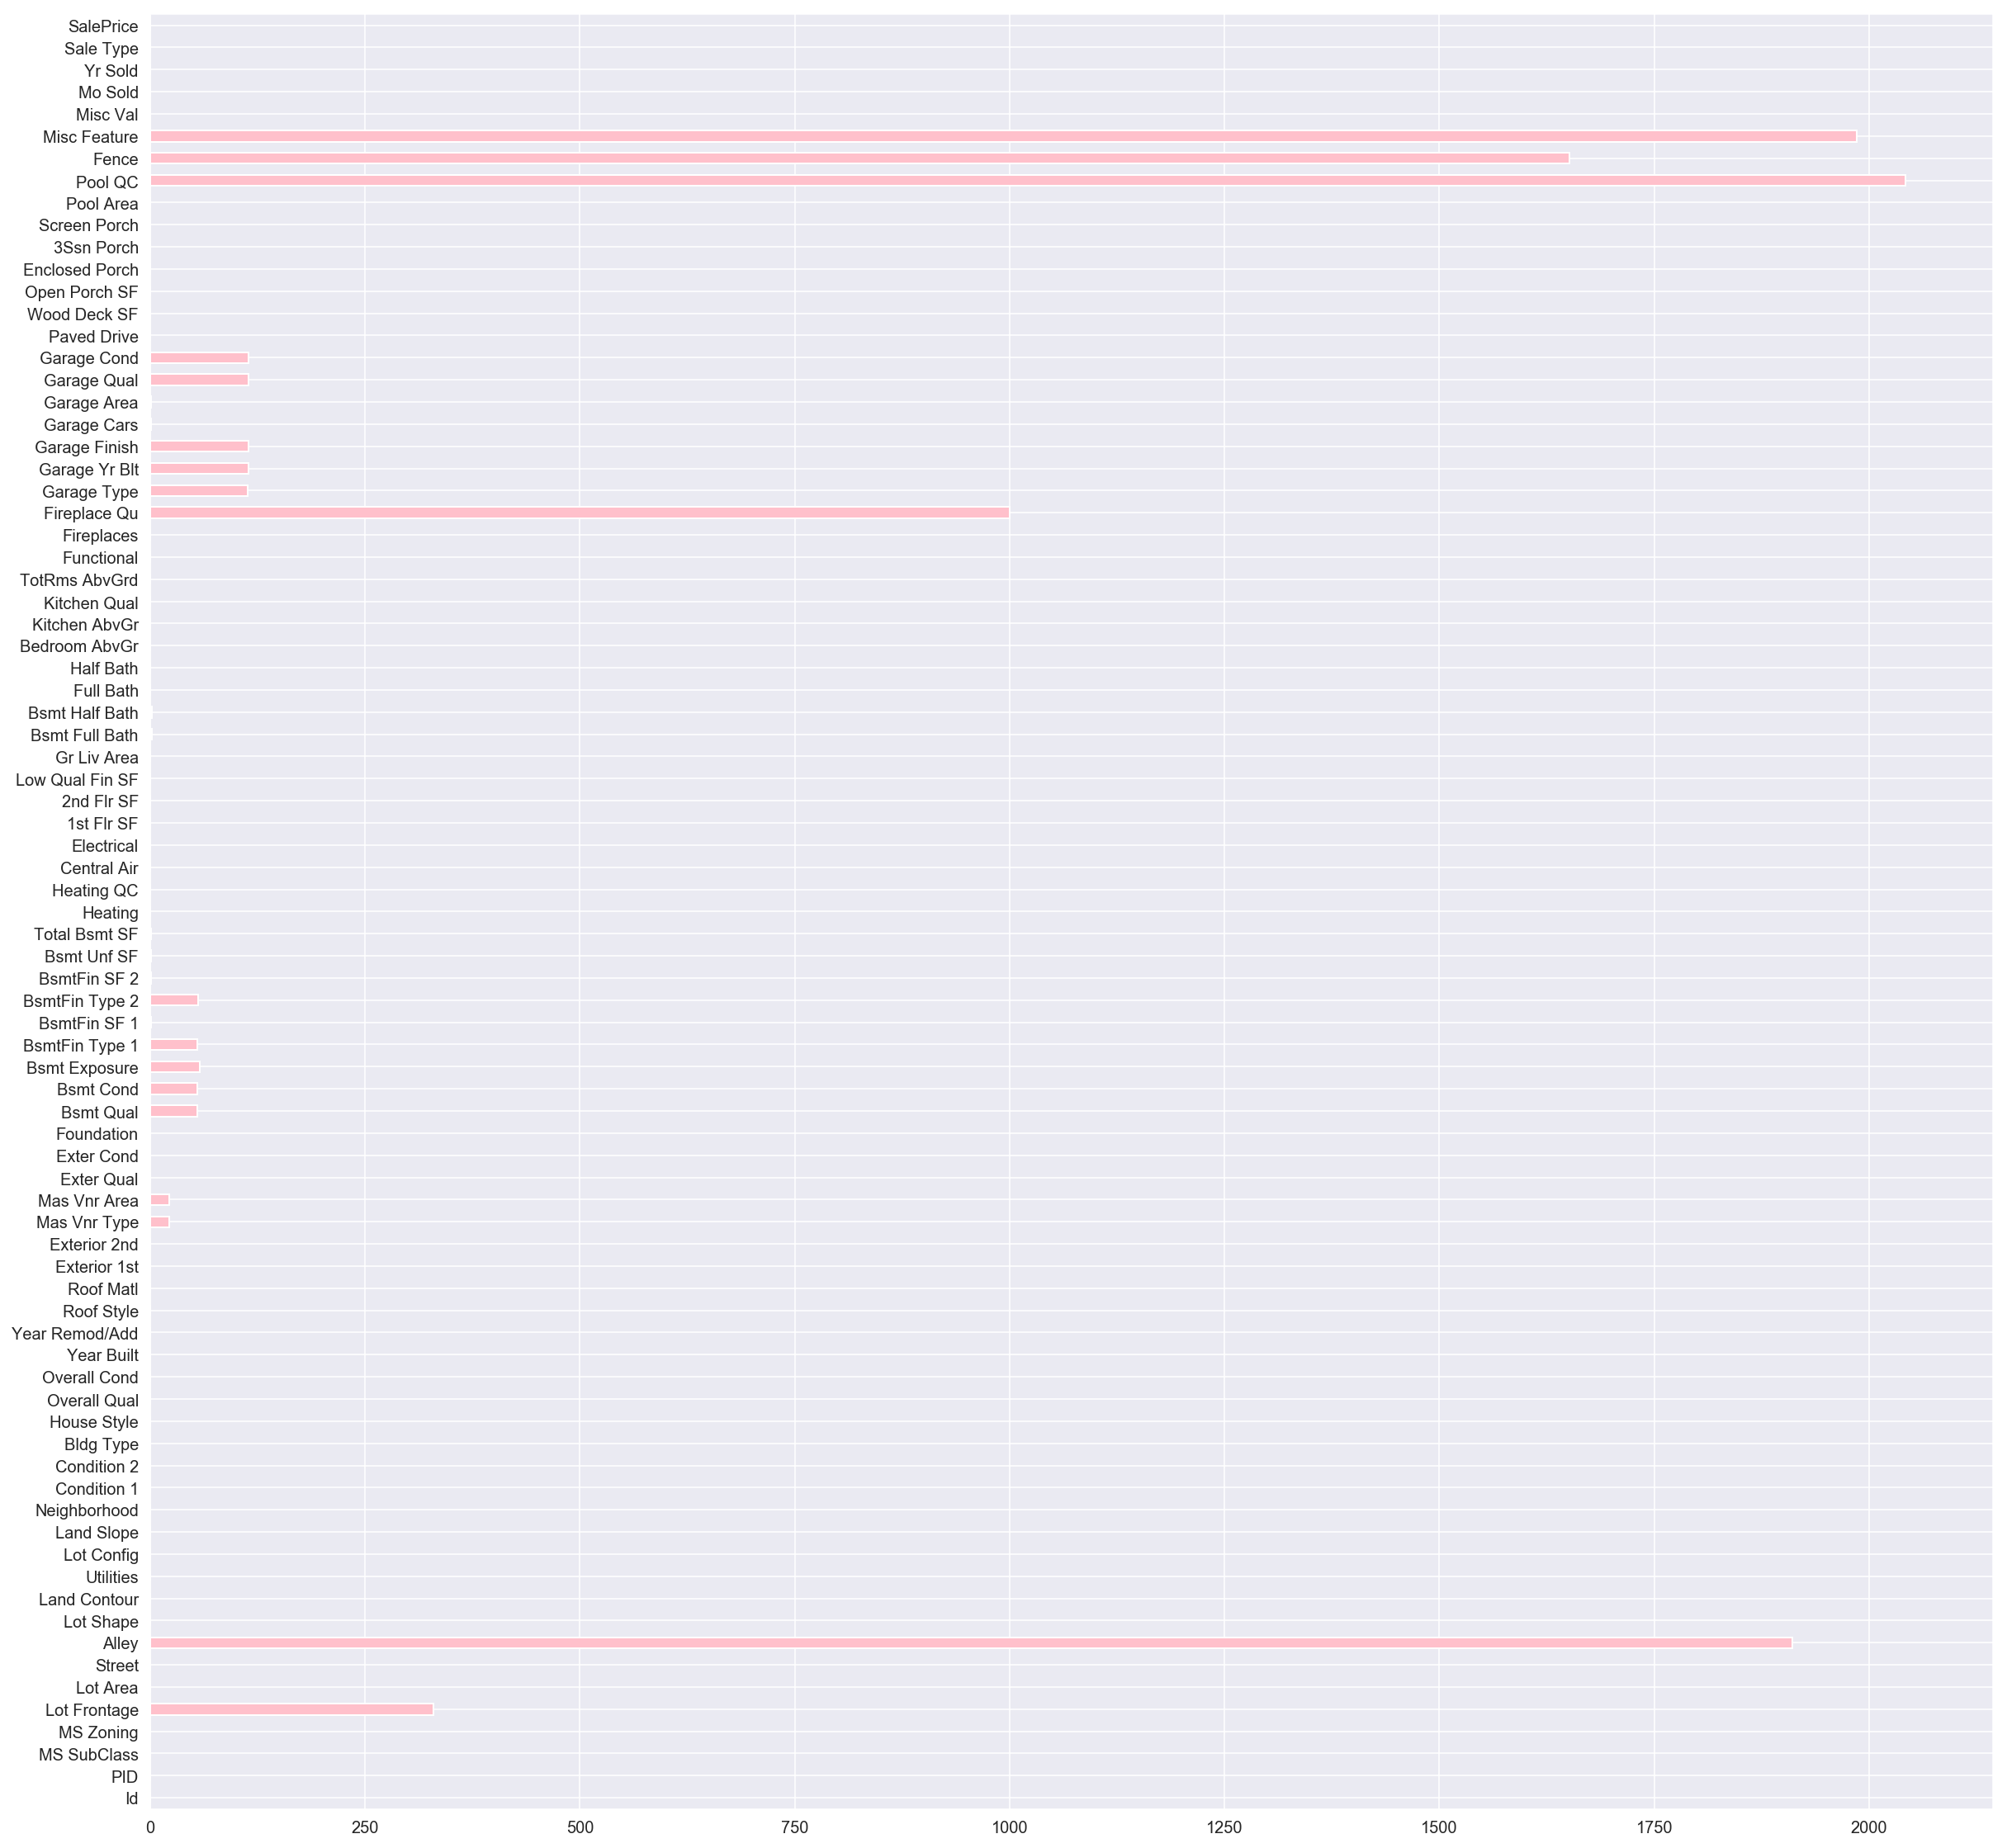

In [7]:
plt.figure(figsize = (20,20))
sns.set_style("darkgrid")
train.isnull().sum().plot(kind = 'barh',color='pink');
# probably look at the fields > 70 

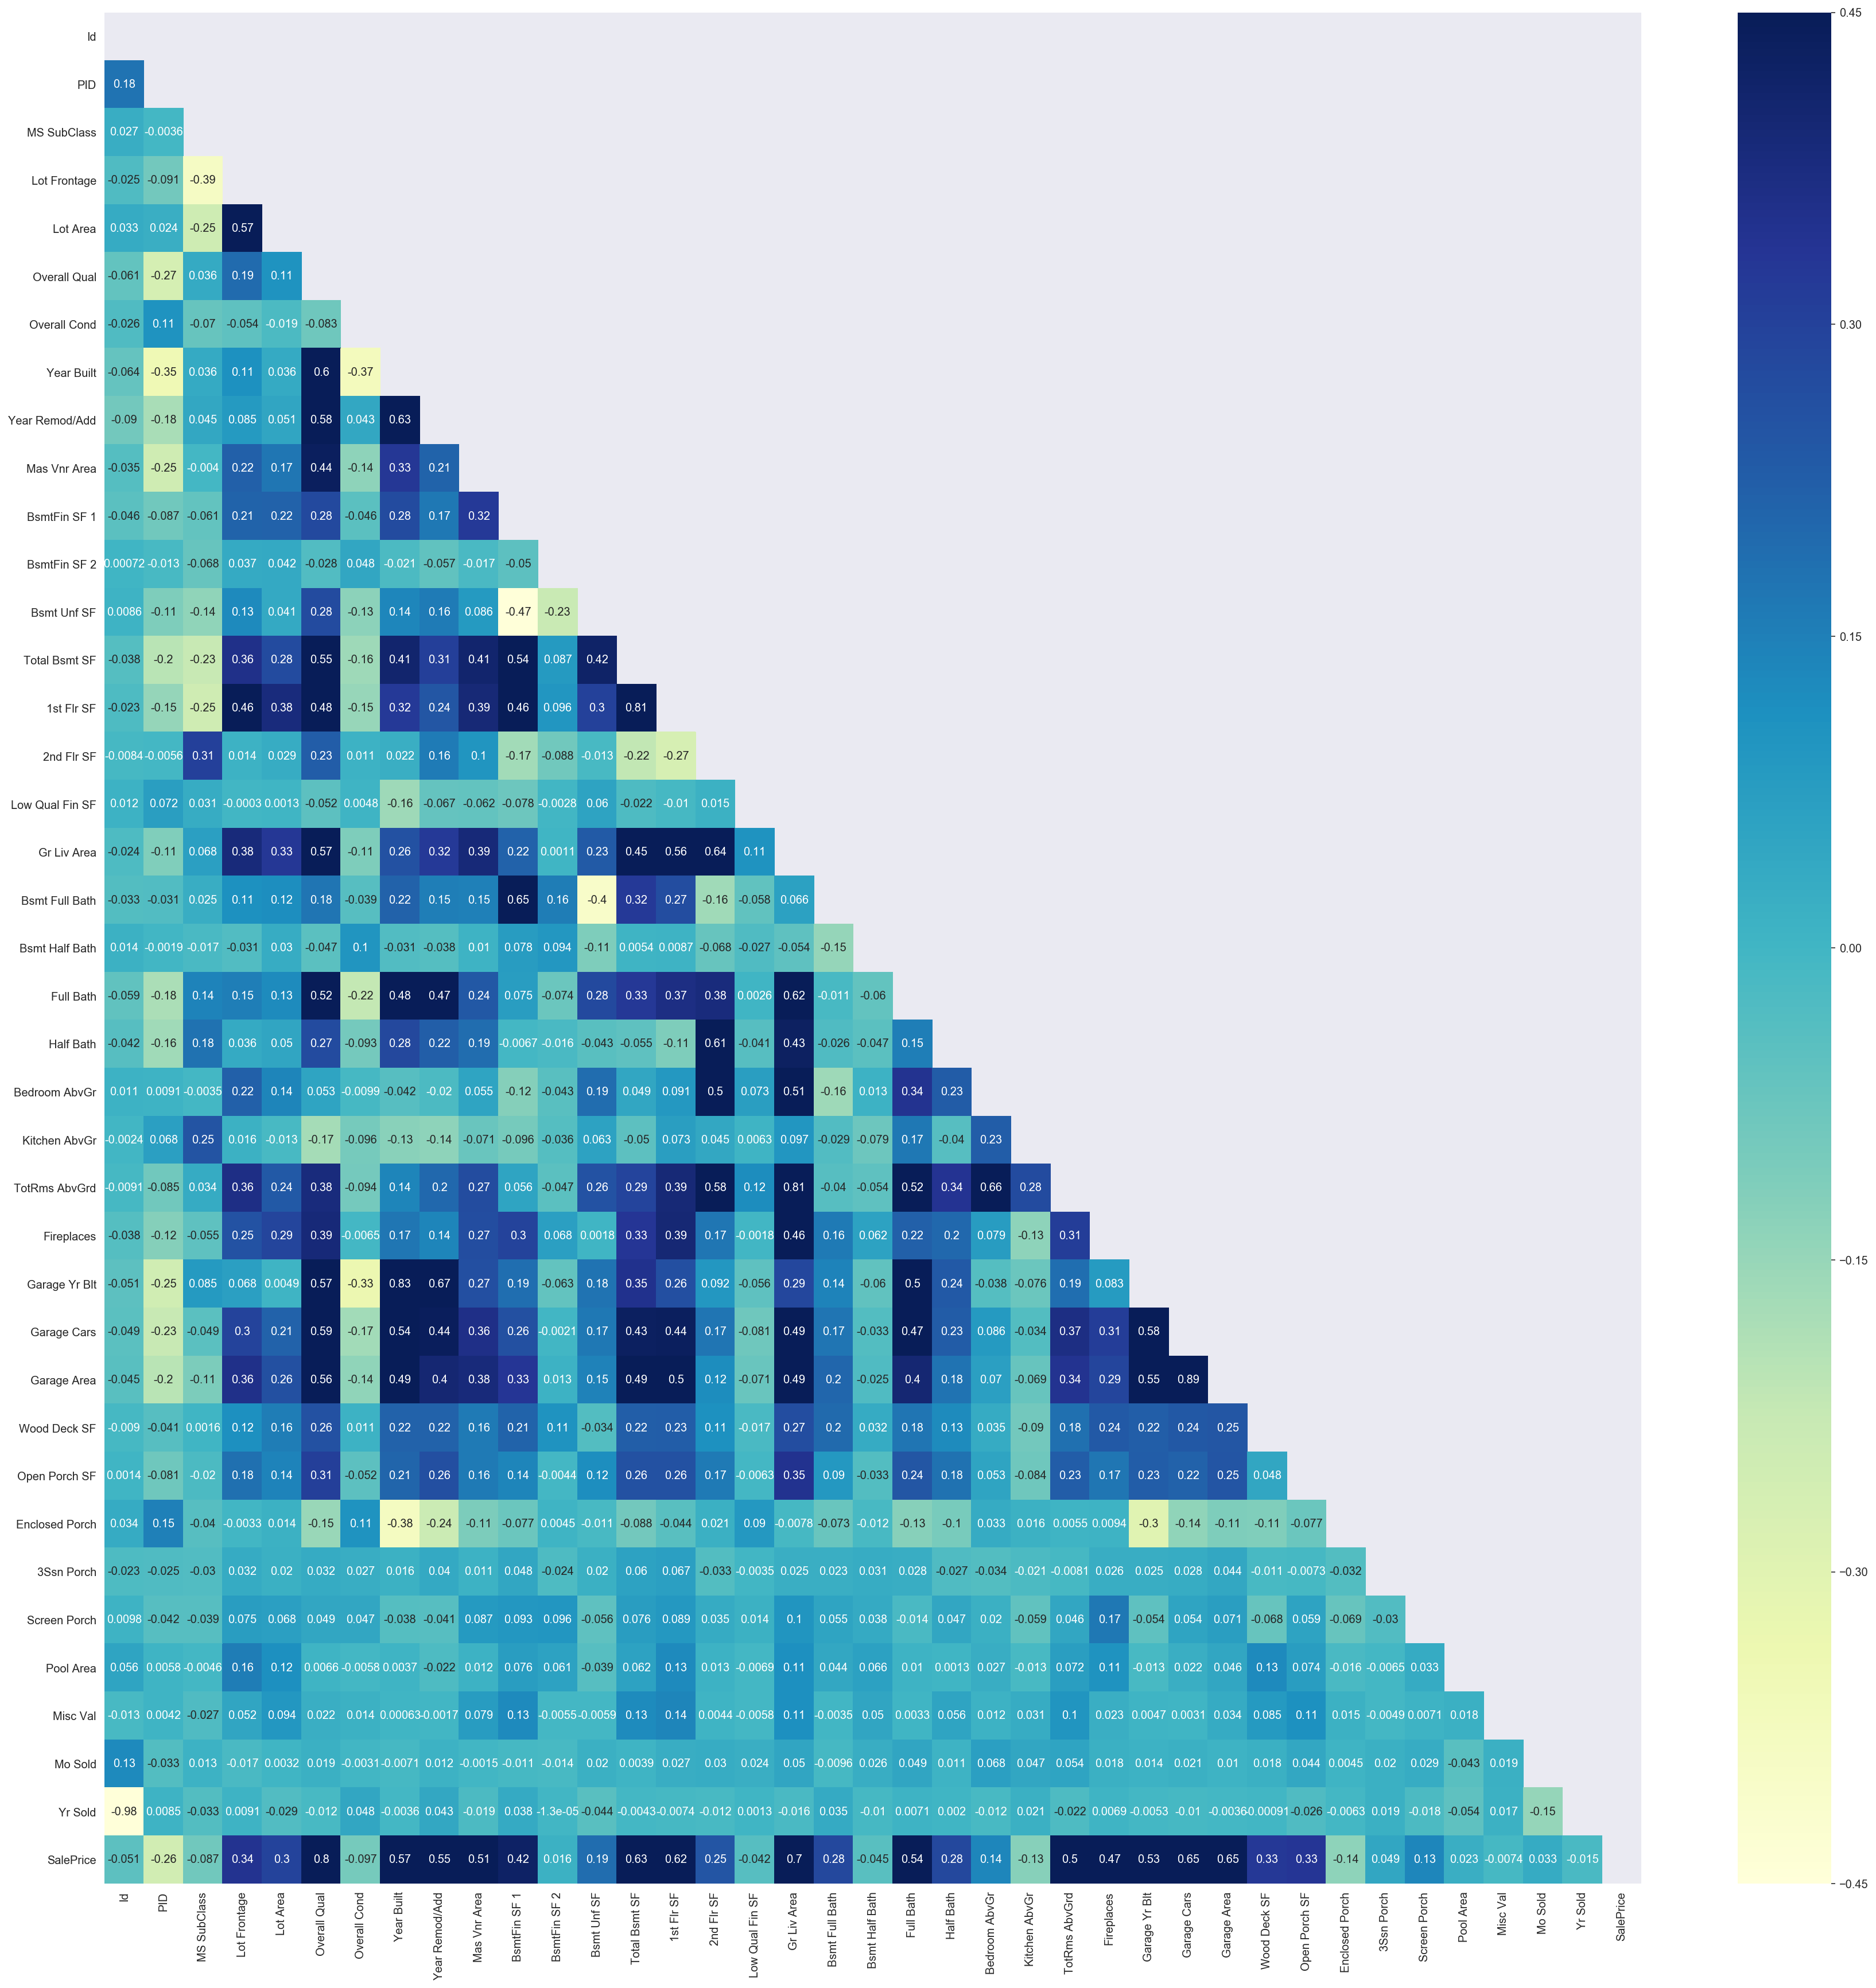

In [8]:
plt.figure(figsize=(30,30))
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, cmap = 'YlGnBu', annot=True, vmin = -0.45, vmax = 0.45);

In [9]:
# let's go ahead and remove columns that are more than 1k null's 
# Alley, Fireplace Qu, Pool QC, Fence, Misc Feature <- read why these columns contain so many NULLs
# Look from correlation matrix not too correlated with Lot Frontage anyways so we can drop that .  
# lots of bsmt features have NULLs could be due to houses with no basement info
# similarly with garaging <- rural areas will less likely have real garaging.
# what is Mas Vnr??? 

In [10]:
# remove outliers 
train = train[(train['Gr Liv Area']<4000) & (train['Lot Area']<25000)]

In [11]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
# 1. let's start with splitting attributes based on
# categorical, ordinal, numeric
# 2. drop columns from each category based on personal preference of relevance
# 3. CLEAN SHIT UP.... 

In [13]:
Nominal = ['Sale Type','Neighborhood','Bldg Type', 'House Style','Foundation'] # no sale condition from jse site
# Bldg Type & Sale Type
# split bldg type - 1Fam, TwnhmE, Else
# split Sale Type - New, Oth&CWD, Else
# I want to use neighborhood, but will need extra time to group based on neighborhood prices (pivots)
Numerical = ['Lot Area','Year Built', 'Year Remod/Add', 
             'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
             '2nd Flr SF','Gr Liv Area', 'Bsmt Full Bath',
             'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
             'Kitchen AbvGr','TotRms AbvGrd',
             'Garage Area','Wood Deck SF', 'Open Porch SF','Screen Porch',
             'Mo Sold', 'Yr Sold' ,'SalePrice']
Ordinal = ['Overall Qual','Overall Cond','Paved Drive']
# only use overall 'overall qual'
Target = ['SalePrice']

In [14]:
Nom_train = train[Nominal]
Num_train = train[Numerical]
Ord_train = train[Ordinal]

In [15]:
# boxplots for categorical 
# histograms for numerical
# can I write a loop for these things? 
# how do I remove outliers - make sure I remove the ones recommended.
# will need to read through suggestions again... 

Text(0, 0.5, 'Above Ground Living Area')

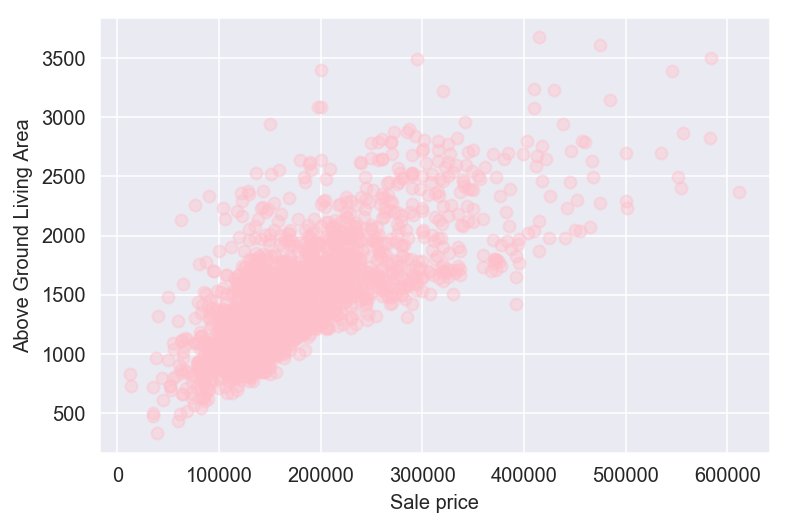

In [16]:
plt.scatter(train['SalePrice'],train['Gr Liv Area'], color = 'pink', alpha = 0.4)
plt.xlabel('Sale price')
plt.ylabel('Above Ground Living Area')

In [17]:
Num_train[Num_train['Gr Liv Area']>=3500]

,Lot Area,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Mo Sold,Yr Sold,SalePrice
1035,22950,1892,1993,0.0,0.0,1107.0,1107.0,1518,1518,3608,...,4,1,12,840.0,0,260,410,6,2006,475000
1692,17242,1993,1994,292.0,1393.0,48.0,1733.0,1933,1567,3500,...,4,1,11,959.0,870,86,210,5,2006,584500
1897,19800,1935,1990,425.0,0.0,1411.0,1836.0,1836,1836,3672,...,5,1,7,836.0,684,80,0,12,2006,415000


In [18]:
Ord_train.head(2)

for i in Ord_train:
#     print(i)
    print(Ord_train[i].value_counts())

5     555
6     498
7     427
8     248
4     157
9      75
3      28
10     21
2       9
1       3
Name: Overall Qual, dtype: int64
5    1151
6     366
7     263
8     101
4      68
3      33
9      29
2       6
1       4
Name: Overall Cond, dtype: int64
Y    1839
N     146
P      36
Name: Paved Drive, dtype: int64


In [19]:
Ord_train['Overall Qual'].mean()
Ord_train['Overall Qual'].median()

6.0

In [23]:
# Ord_train['Overall Qual'].value_counts()

(array([  3.,   9.,  28., 157., 555., 498., 427., 248.,  75.,  21.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

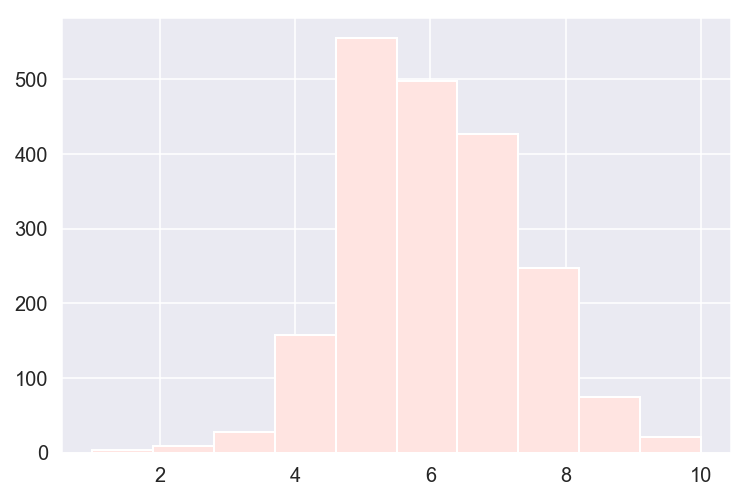

In [24]:
plt.hist(Ord_train['Overall Qual'],bins=10,color='mistyrose' ) # slice by 5
# plt.hist(Ord_train['Overall Cond'],bins=9,color='mistyrose' ) # mostly in 5's

In [21]:
# can i have a list of lists and loop through and then check within each list plot the stuff????? dunno..
# work with Nominal data first
Nom_train.head(2)

for i in Nom_train:
#     print(i)
    print(Nom_train[i].value_counts())

WD       1754
New       157
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64
NAmes      307
CollgCr    180
OldTown    162
Edwards    140
Somerst    130
NridgHt    122
Gilbert    113
Sawyer     110
NWAmes      87
SawyerW     86
Mitchel     78
BrkSide     76
Crawfor     69
IDOTRR      69
NoRidge     47
Timber      46
StoneBr     36
SWISU       32
MeadowV     24
Blmngtn     22
ClearCr     21
BrDale      19
NPkVill     17
Veenker     16
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64
1Fam      1674
TwnhsE     161
Duplex      74
Twnhs       69
2fmCon      43
Name: Bldg Type, dtype: int64
1Story    1036
2Story     593
1.5Fin     216
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64
PConc     917
CBlock    844
BrkTil    220
Slab       33
Stone       5
Wood        2
Name: Foundation, dtype: int64


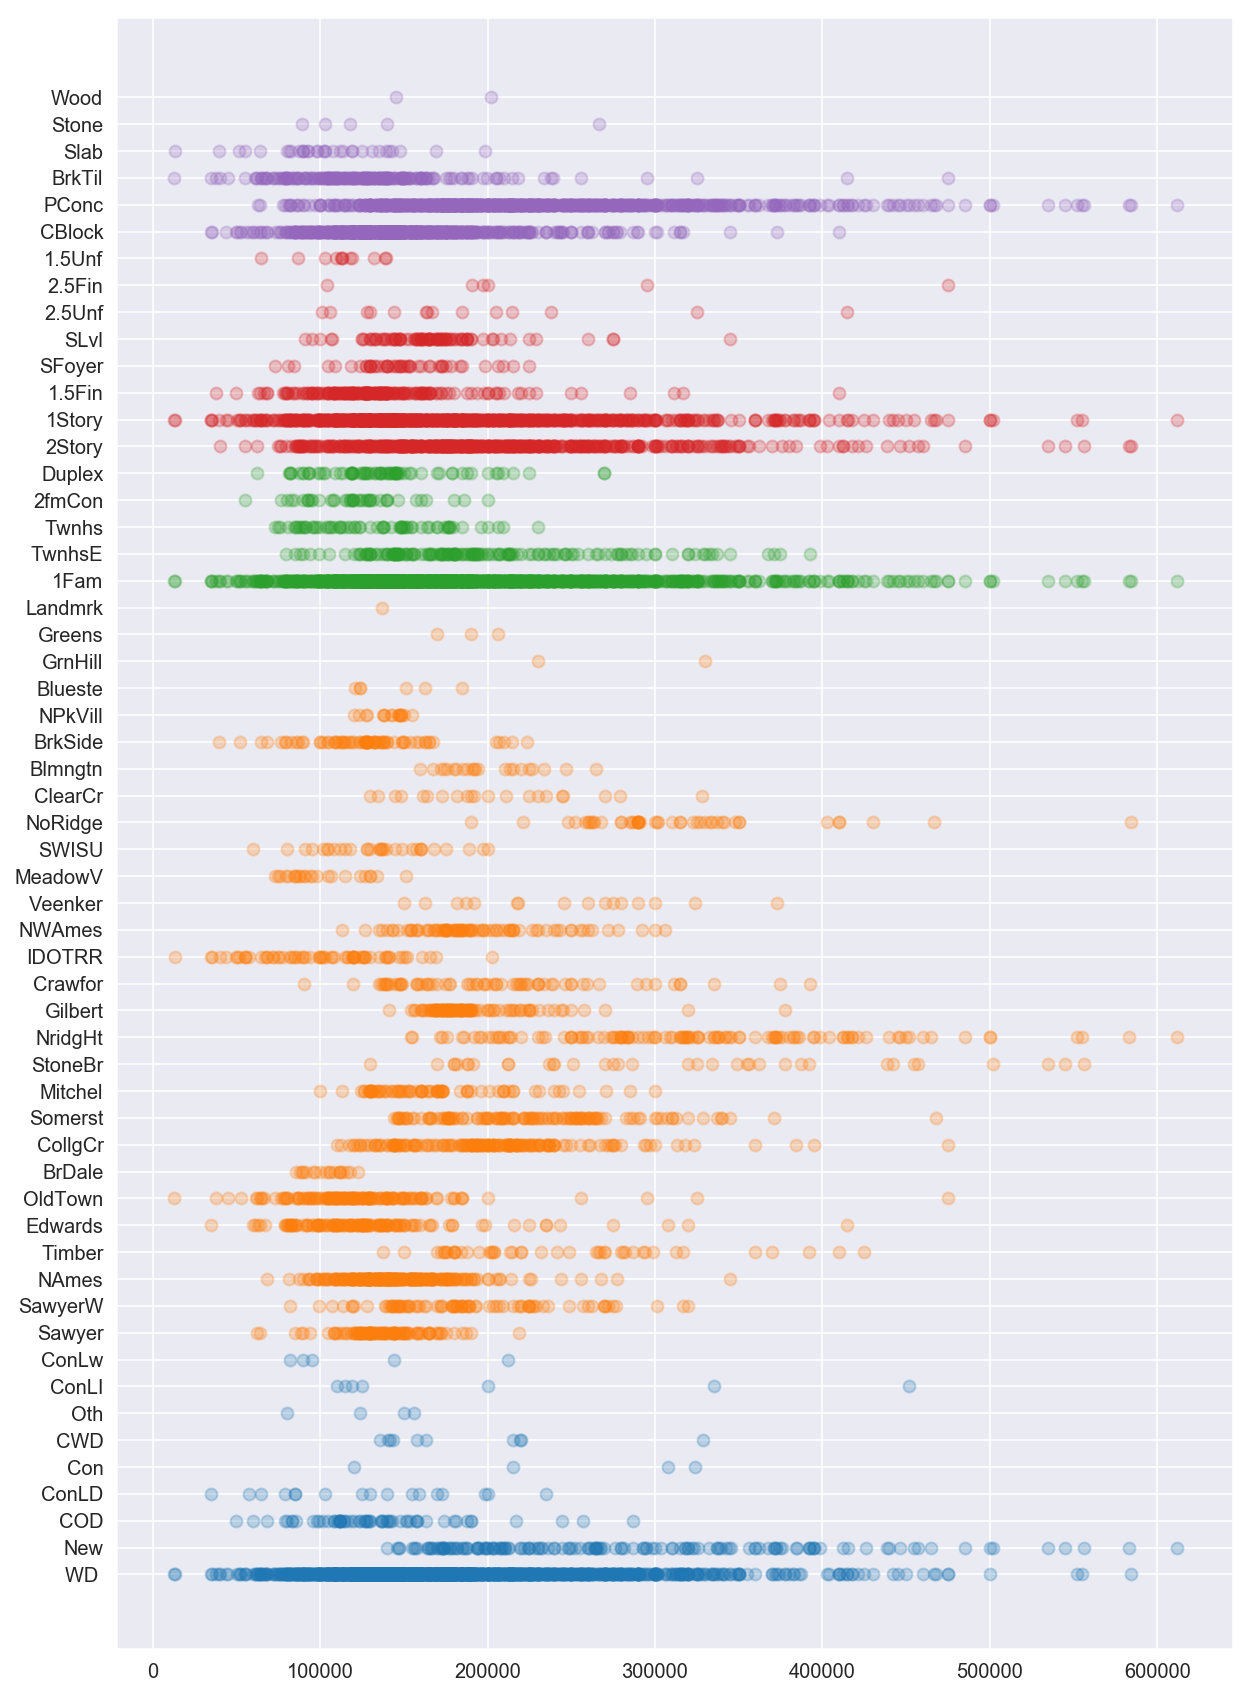

In [22]:
plt.figure(figsize = (10,15))
# sns.palettes('Blues')
sns.set_style('darkgrid')
# plt.xkcd()
for i in Nom_train:
    plt.scatter(train['SalePrice'],Nom_train[i],alpha=0.25)


In [23]:
def subplot_histograms(dataframe, list_of_columns, list_of_xlabels, figsize):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows

    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = figsize) # You'll want to specify your figsize
          
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = 'c') # feel free to add more settings
#         plt.grid(True)
        # Set titles, labels, etc here for each subplot
        # you can also just ax[i].set_title(list_of_titles[i])
    for enum, xlabel in enumerate(list_of_xlabels): 
        ax[enum].set_xlabel(xlabel, fontsize = 12)
        ax[enum].set_ylabel('Frequency', fontsize = 12)
#     for enu, title in enumerate(list_of_titles):
#         ax[enu].set_title(title, fontsize = 16)

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


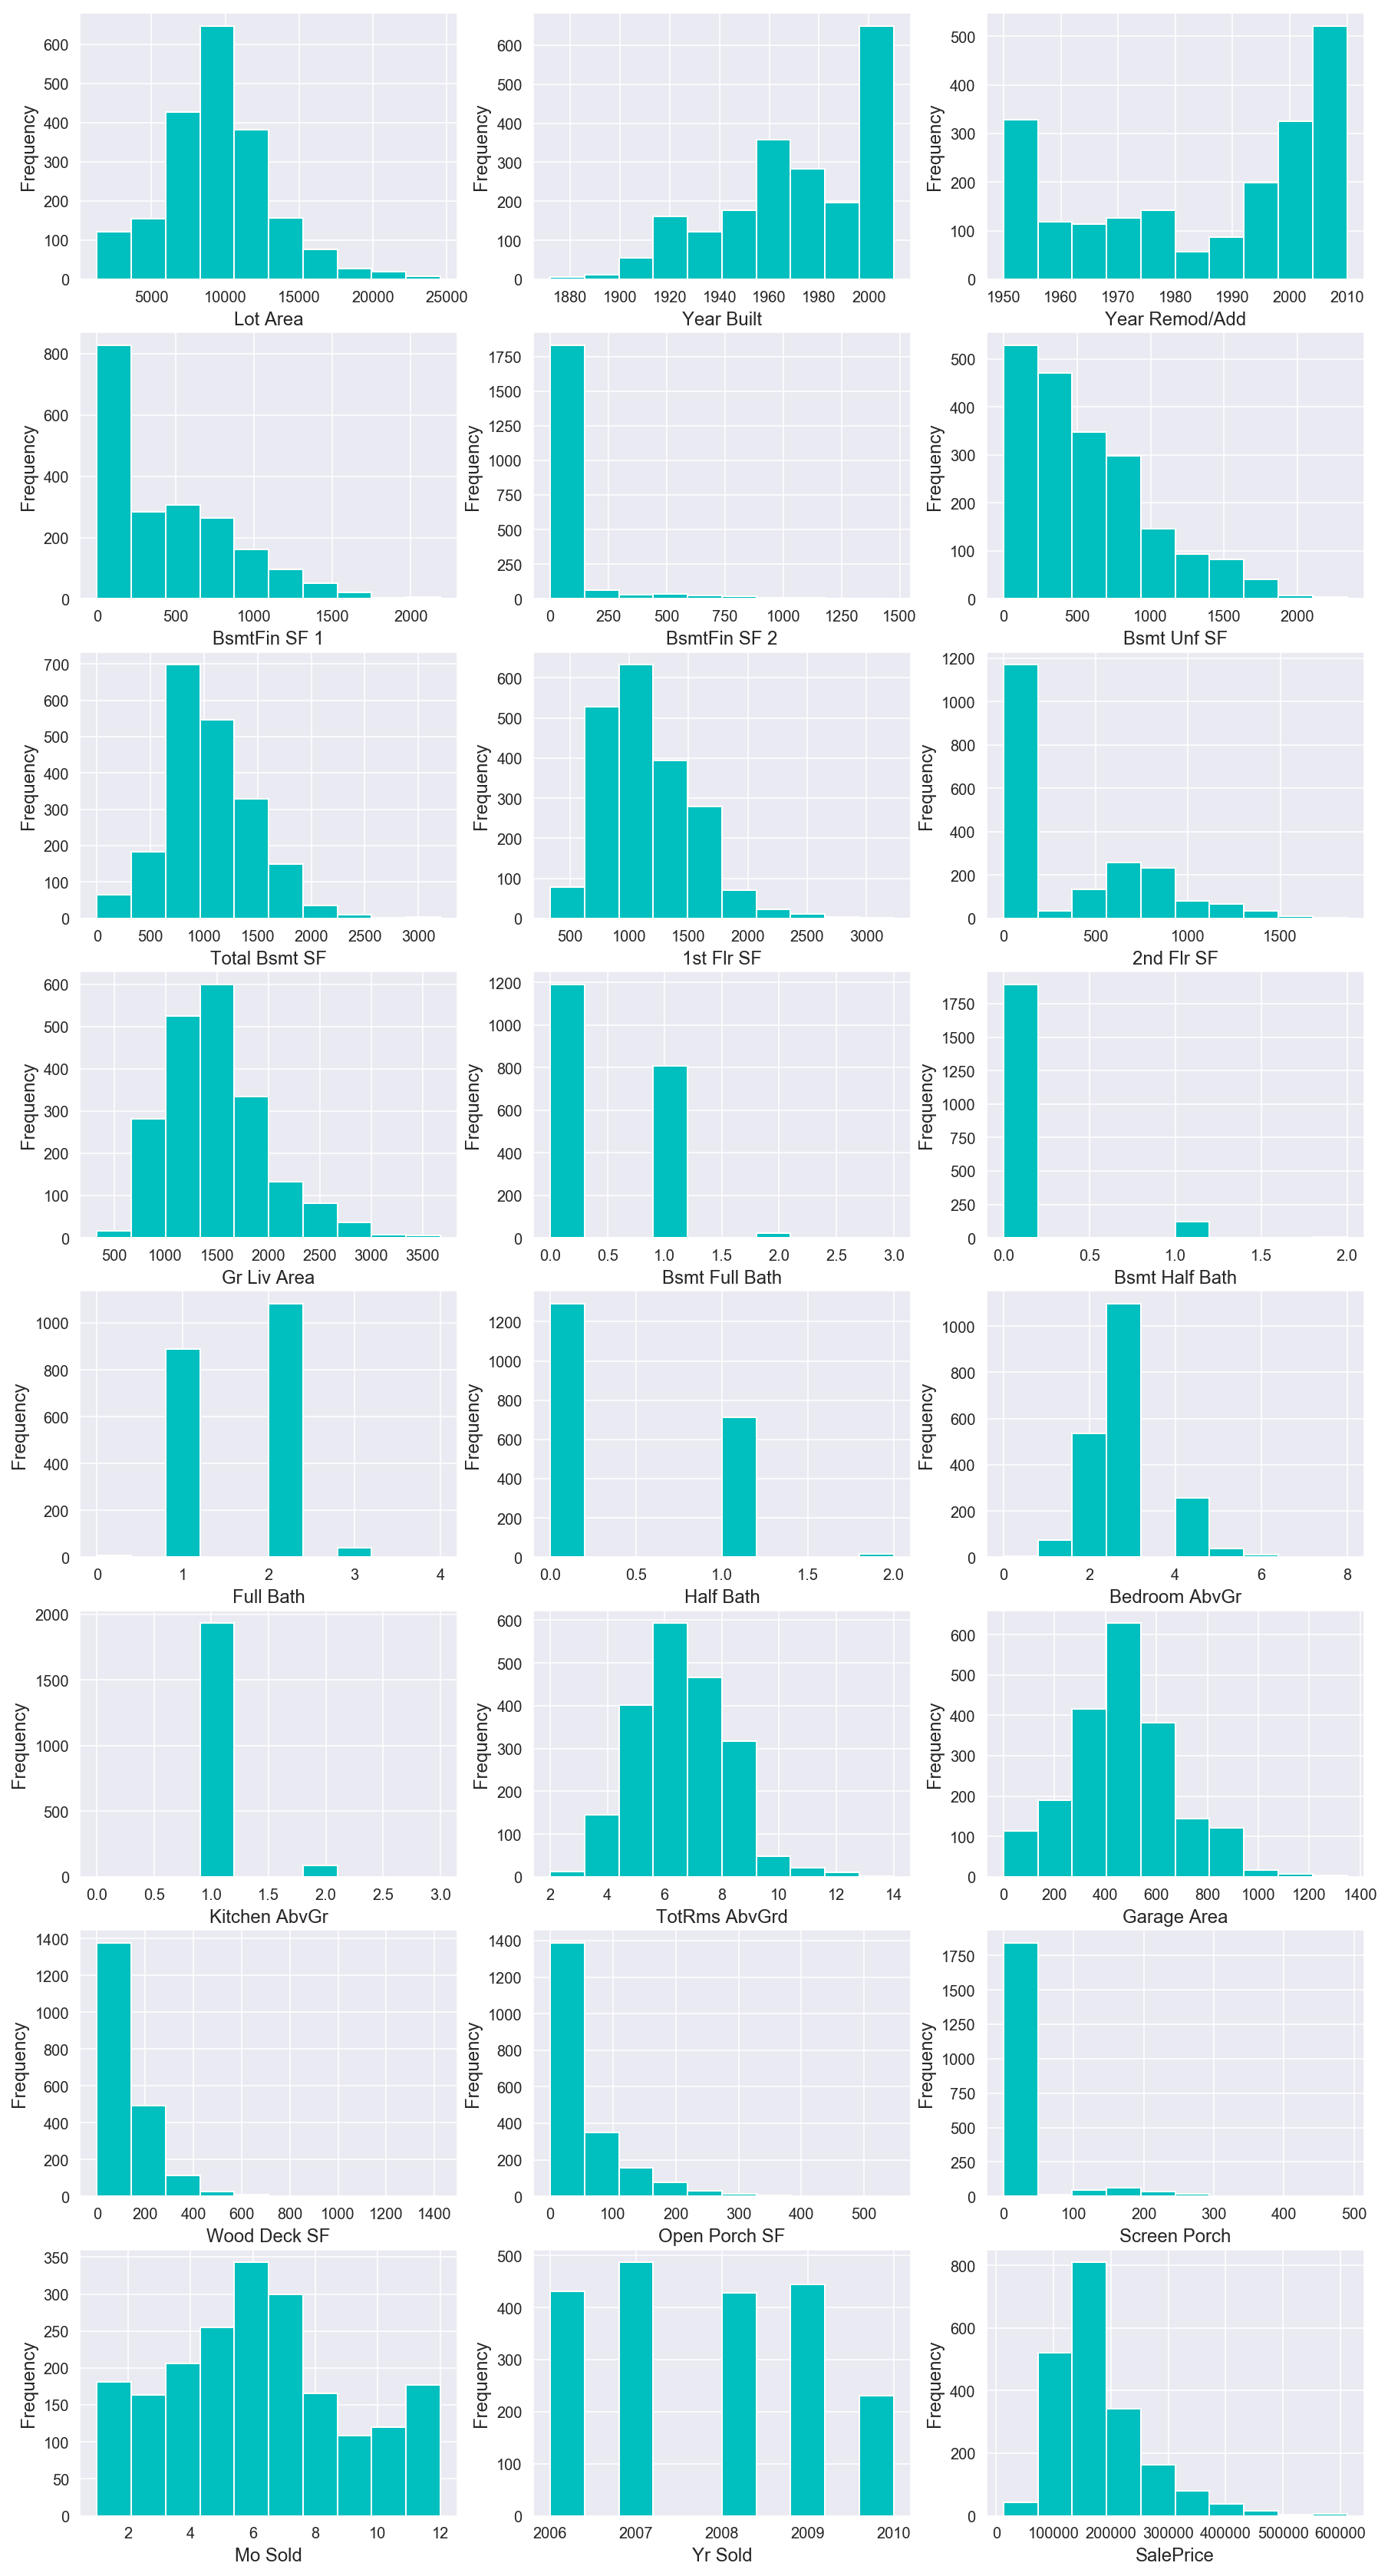

In [24]:
subplot_histograms(Num_train,Numerical, Numerical, (15,30))

SalePrice    180641.926274
dtype: float64
SalePrice    162000.0
dtype: float64
SalePrice    78311.961579
dtype: float64


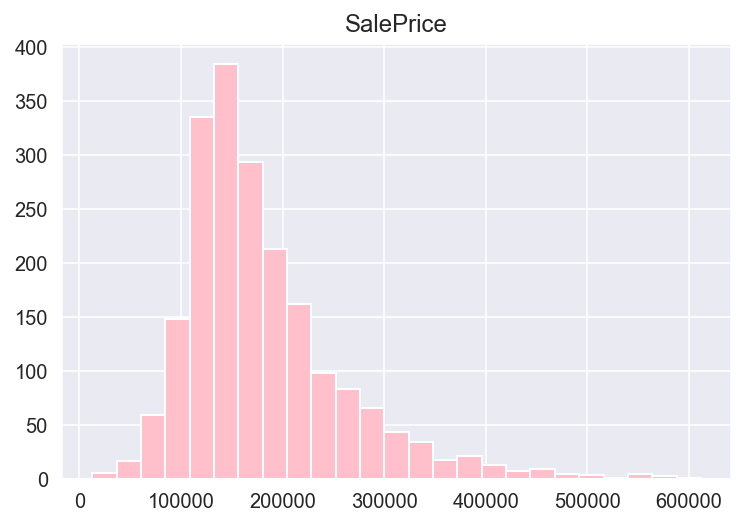

In [25]:
print(train[Target].mean())
print(train[Target].median())
print(train[Target].std())
train[Target].hist(color='pink',bins=25);

In [26]:
Num_train[Num_train['Gr Liv Area'] == Num_train['1st Flr SF']+Num_train['2nd Flr SF']].shape

(1988, 24)

In [27]:
Num_train['Outdoor Liv Area']=Num_train['Wood Deck SF']+Num_train['Open Porch SF']+Num_train['Screen Porch']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


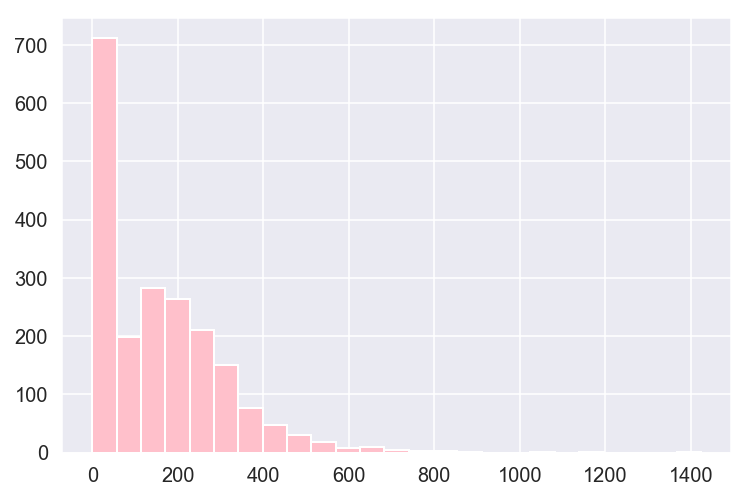

In [28]:
Num_train['Outdoor Liv Area'].hist(color='pink',bins = 25);

In [29]:
Num_train.head(2)

,Lot Area,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Mo Sold,Yr Sold,SalePrice,Outdoor Liv Area
0,13517,1976,2005,533.0,0.0,192.0,725.0,725,754,1479,...,1,6,475.0,0,44,0,3,2010,130500,44
1,11492,1996,1997,637.0,0.0,276.0,913.0,913,1209,2122,...,1,8,559.0,0,74,0,4,2009,220000,74


In [30]:
Num_train[Num_train['Gr Liv Area'] > Num_train['1st Flr SF']+Num_train['2nd Flr SF']]

,Lot Area,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Mo Sold,Yr Sold,SalePrice,Outdoor Liv Area
249,11067,1939,1950,0.0,0.0,0.0,0.0,640,0,845,...,1,4,256.0,48,0,0,3,2007,68104,48
269,3180,2005,2005,0.0,0.0,600.0,600.0,520,600,1200,...,1,4,480.0,0,166,0,4,2006,144152,166
320,12358,1941,1950,360.0,0.0,360.0,720.0,854,0,1382,...,1,7,660.0,237,0,0,5,2007,128500,237
356,8470,1915,1982,0.0,0.0,1013.0,1013.0,1013,0,1526,...,1,6,0.0,0,0,0,10,2009,85000,0
382,5520,1912,1950,0.0,0.0,755.0,755.0,929,929,2229,...,1,8,0.0,0,198,0,7,2009,104000,198
497,10480,1936,1950,0.0,0.0,1064.0,1064.0,1166,0,1639,...,1,6,240.0,0,0,0,3,2008,115000,0
705,11426,1910,1996,0.0,0.0,828.0,828.0,828,658,1594,...,2,9,0.0,0,172,0,6,2008,118000,172
828,10410,1915,1950,0.0,0.0,1313.0,1313.0,1313,0,2377,...,1,8,528.0,0,0,0,6,2009,142900,0
858,10896,1914,1995,256.0,0.0,1184.0,1440.0,1440,1440,3395,...,2,14,0.0,0,110,0,3,2007,200000,110
918,8820,1890,1996,1088.0,0.0,0.0,1088.0,1188,561,1869,...,1,7,456.0,48,0,0,9,2009,124900,48


In [31]:
Num_train[Num_train['Total Bsmt SF'] < Num_train['BsmtFin SF 1']+Num_train['BsmtFin SF 2']+Num_train['Bsmt Unf SF']].shape

(0, 25)

In [32]:
Num_train[Num_train['Total Bsmt SF'] > Num_train['BsmtFin SF 1']+Num_train['BsmtFin SF 2']+Num_train['Bsmt Unf SF']].shape

(0, 25)

In [33]:
Num_train[Num_train['Lot Area']>=25000].shape

(0, 25)

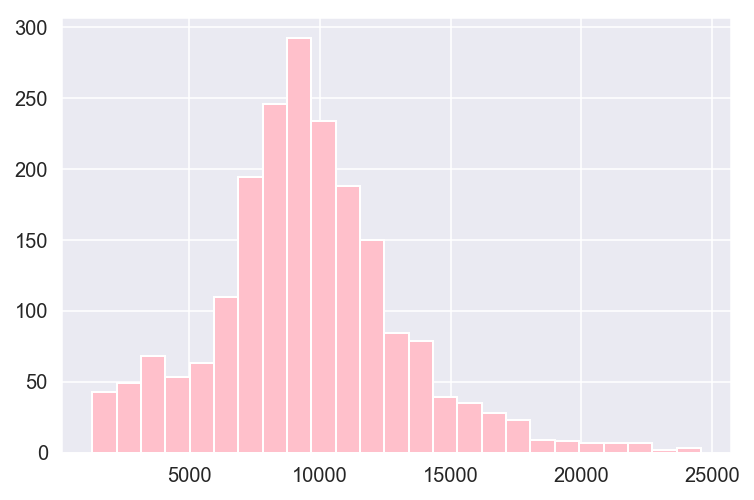

In [34]:
Num_train[Num_train['Lot Area']<25000]['Lot Area'].hist(color = 'pink',bins=25)

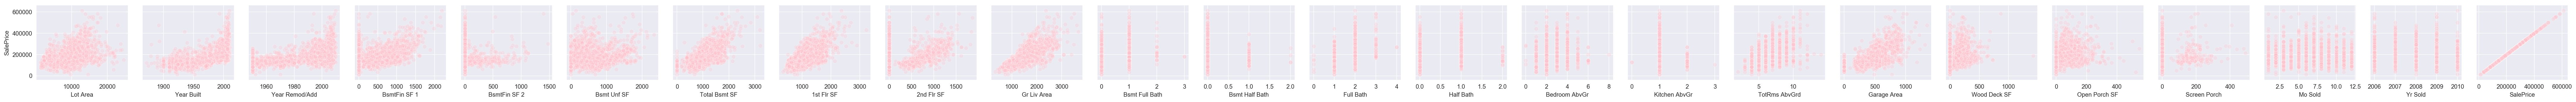

In [35]:
# plt.figure(figsize = (20,20))

sns.pairplot(
            data = train,
            x_vars = Numerical,
            y_vars = Target,
            plot_kws=dict(s=50,color='pink', edgecolor="white",  alpha = 0.25)
);

In [36]:
Num_train.head(2)

,Lot Area,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,...,Kitchen AbvGr,TotRms AbvGrd,Garage Area,Wood Deck SF,Open Porch SF,Screen Porch,Mo Sold,Yr Sold,SalePrice,Outdoor Liv Area
0,13517,1976,2005,533.0,0.0,192.0,725.0,725,754,1479,...,1,6,475.0,0,44,0,3,2010,130500,44
1,11492,1996,1997,637.0,0.0,276.0,913.0,913,1209,2122,...,1,8,559.0,0,74,0,4,2009,220000,74


In [38]:
# let us first create simple linear regressions 

Num_train.columns

Num_train_keep = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd',  'Mo Sold', 'Yr Sold', 'Outdoor Liv Area','SalePrice']

Num_train_ds1 = Num_train[Num_train_keep]

Num_train_ds1.to_csv('./datasets/Numerical_data_cleaned_for_first_sub.csv')